# Prediction using Unsupervised ML

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Author: SHRIYA

## Importing relevant Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

## Importing the Iris dataset

In [9]:
iris=pd.read_csv("IRIS.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Here, we see that there are no null values. For the purpose of clustering we drop columns Id and Species.

In [7]:
df=iris.iloc[:,1:5]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding optimum no. of Clusters for k-means Classification using The Elbow Method

In [12]:
x=df.iloc[:,:].values
css=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters = i, init = 'k-means++',max_iter=400,n_init=10,random_state=0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)

## Plotting Graph

Text(0, 0.5, 'Sum of Squares due to variation within Clusters')

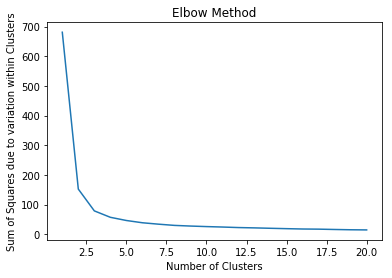

In [25]:
plt.plot(range(1,21),css)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares due to variation within Clusters")

### The elbow of the curve is close to 3, so, No. of Clusters = 3

## Applying k-means on our data 

In [15]:
kmeans=KMeans(n_clusters = 3, init = 'k-means++',max_iter=400,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

## Visualising Clusters

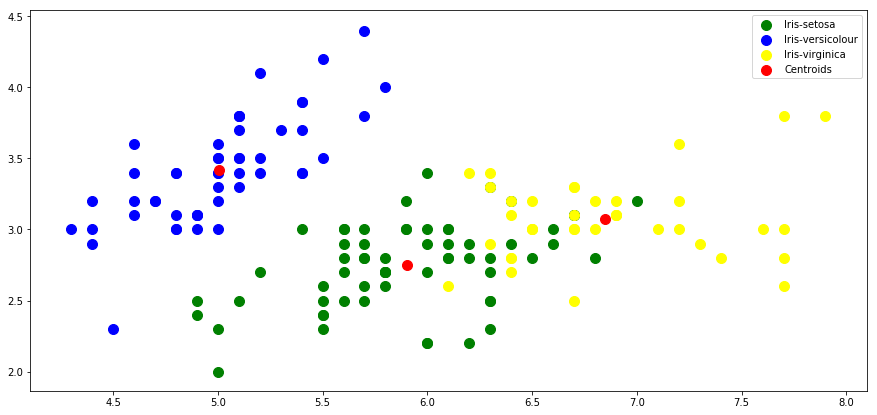

In [23]:
plt.figure(figsize=(15,7))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,color="green",label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,color="blue",label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,color="yellow",label="Iris-virginica")

#Centroids of Clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color="red",label="Centroids")
plt.legend()